In [3]:
# import numpy as np
import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_deltamu = np.linspace(-1.0, 1.0, 11)

nb_pas_temps = 10
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=1

# interpreter.gamma_dt(parametres[0], (x,y), kT, deltamu)
# interpreter.rugosite_dt(nb_pas_temps, parametres[1], (x,y), kT[0], deltamu[0])


# interpreter.plot_growth_2d(grid, show=True)

In [3]:
liste_moy_gamma_kbt=[]
liste_moy_rugosite_kbt=[]
liste_std_gamma_kbt=[]
liste_std_rugosite_kbt=[]
for param_kbT in liste_kT:
    print(param_kbT)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_gamma)

    liste_moy_gamma_kbt.append(gamma_moy_param)
    liste_moy_rugosite_kbt.append(rugosite_moy_param)

    liste_std_gamma_kbt.append(gamma_std_param)
    liste_std_rugosite_kbt.append(rugosite_std_param)



0.5
L'événement est une désorption au site 24
L'événement est une adsorption au site 21
L'événement est une adsorption au site 6
L'événement est une adsorption au site 56
L'événement est une désorption au site 45
L'événement est une désorption au site 75
L'événement est une adsorption au site 78
L'événement est une adsorption au site 95
L'événement est une désorption au site 45
L'événement est une désorption au site 53
0.75
L'événement est une désorption au site 31
L'événement est une adsorption au site 17
L'événement est une désorption au site 17
L'événement est une désorption au site 88
L'événement est une désorption au site 57
L'événement est une désorption au site 31
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\laure\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\laure\AppData\Local\Temp\ipykernel_19356\2045535325.py", line 14, in <module>
    grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True)
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\laure\OneDrive\Documents\École\Génie physique\3e année\Hiver 2025\Projet 3\Projet3\Git\Projet_3_PHS3903\KMC.py", line 44, in KMC2D
    deltaE = domain.potentiel(config,i,positions_surface)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\laure\OneDrive\Documents\École\Génie physique\3e année\Hiver 2025\Projet 3\Projet3\Git\Projet_3_PHS390

In [ ]:
liste_gamma_moy_mu=[]
liste_rugosite_moy_mu=[]
liste_gamma_std_mu=[]
liste_rugosite_std_mu=[]
for param_mu in liste_deltamu:
    print(param_mu)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        x = 20
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_moy_param=np.mean(liste_gamma)
    rugosite_moy_param=np.mean(liste_rugosite)

    gamma_std_param=np.std(liste_gamma)
    rugosite_std_param=np.std(liste_gamma)

    liste_gamma_moy_mu.append(gamma_moy_param)
    liste_rugosite_moy_mu.append(rugosite_moy_param)

    liste_gamma_std_mu.append(gamma_std_param)
    liste_rugosite_std_mu.append(rugosite_std_param)

NameError: name 'liste_deltamu' is not defined

C:\Users\laure\AppData\Local\Temp\ipykernel_15264\1153471764.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


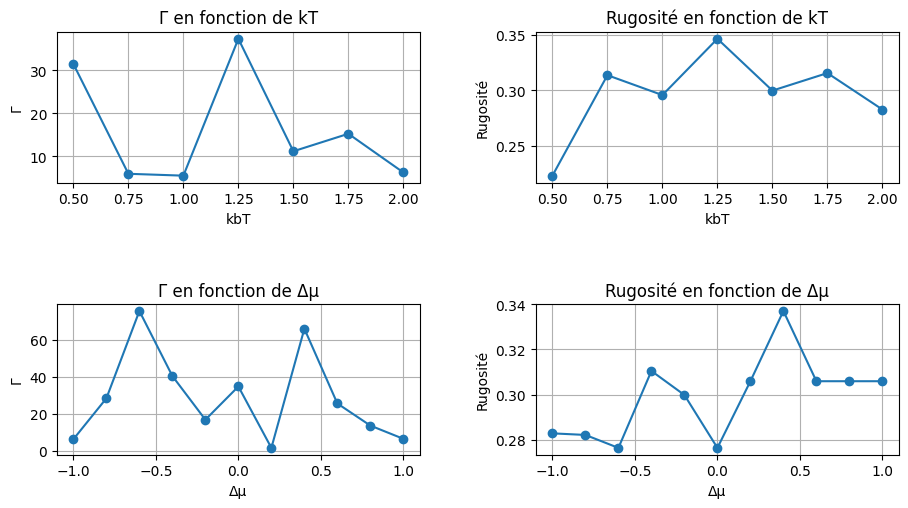

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
ax[0][0].errorbar(liste_kT,liste_moy_gamma_kbt,liste_std_gamma_kbt,fmt='o')
ax[0][0].plot(liste_kT,liste_moy_gamma_kbt,color='#1f77b4')
ax[0][0].grid()
ax[0][0].set_xlabel('kbT')
ax[0][0].set_ylabel('Γ')
ax[0][0].set_title("Γ en fonction de kT")

ax[0][1].errorbar(liste_kT,liste_moy_rugosite_kbt,liste_std_rugosite_kbt,fmt='o')
ax[0][1].plot(liste_kT,liste_moy_rugosite_kbt,color='#1f77b4')
ax[0][1].grid()
ax[0][1].set_xlabel('kbT')
ax[0][1].set_ylabel('Rugosité')
ax[0][1].set_title("Rugosité en fonction de kT")

ax[1][0].errorbar(liste_deltamu,liste_gamma_moy_mu,liste_gamma_std_mu,fmt='o')
ax[1][0].plot(liste_deltamu,liste_gamma_moy_mu,color='#1f77b4')
ax[1][0].grid()
ax[1][0].set_xlabel('Δμ')
ax[1][0].set_ylabel('Γ')
ax[1][0].set_title("Γ en fonction de Δμ")

ax[1][1].errorbar(liste_deltamu,liste_rugosite_moy_mu,liste_rugosite_std_mu,fmt='o')
ax[1][1].plot(liste_deltamu,liste_rugosite_moy_mu,color='#1f77b4')
ax[1][1].grid()
ax[1][1].set_xlabel('Δμ')
ax[1][1].set_ylabel('Rugosité')
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=4.0) 
fig.show()

In [5]:
x=20
hauteur_substrat=10
grid = domain.create_grid(x,y,hauteur_substrat)    
a,b,c=KMC2D(grid,liste_kT[-1],liste_deltamu[-1],10,True,True,True,x*hauteur_substrat)

L'événement est une adsorption au site 3
L'événement est une désorption au site 3
L'événement est une adsorption au site 13
L'événement est une désorption au site 0
L'événement est une adsorption au site 6
L'événement est une adsorption au site 5
L'événement est une adsorption au site 2
L'événement est une adsorption au site 13
L'événement est une adsorption au site 11
L'événement est une adsorption au site 5


C:\Users\laure\AppData\Local\Temp\ipykernel_17404\162639908.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\laure\AppData\Local\Temp\ipykernel_17404\162639908.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


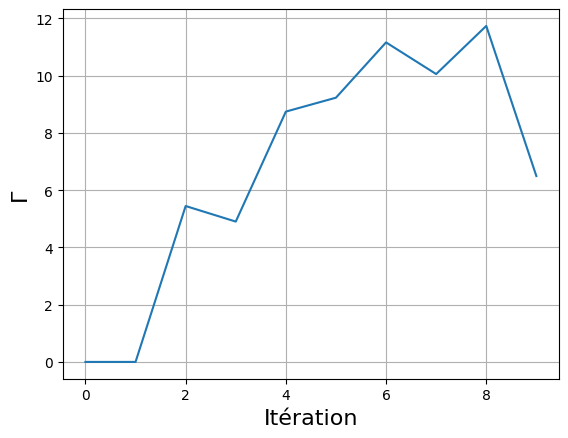

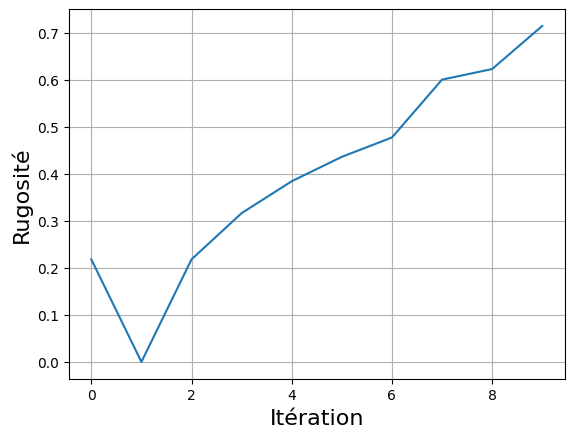

In [9]:
# interpreter.creer_gif("frames")
axe_x=[i for i in range(10)]
fig,ax=plt.subplots()
ax.plot(axe_x,c[0])
ax.grid()
ax.set_xlabel("Itération",fontsize=16)
ax.set_ylabel("Γ",fontsize=16)
fig.show()

fig,ax=plt.subplots()
ax.plot(axe_x,c[1])
ax.set_xlabel("Itération",fontsize=16)
ax.set_ylabel("Rugosité",fontsize=16)
ax.grid()
fig.show()
